# Data Exploration for the Blog dataset

In [2]:
import numpy as np
import pandas as pd
import os

from torchvision.datasets.utils import download_url, download_and_extract_archive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib as mpl
# Use the pgf backend (must be set before pyplot imported)
import matplotlib.pyplot as plt
import seaborn as sns

## `Blog` from `SSDKL`

In [3]:
def load_dataset_from_ssdkl(path_to_folder):
    X = np.load(os.path.join(path_to_folder, "X.npy"))
    y = np.load(os.path.join(path_to_folder, "y.npy"))

    return X, y

PATH_TO_DATASET = "/home/flo/ssdgm/notebooks/datasets/SSDKL/blog"
X_ssdkl, y_ssdkl = load_dataset_from_ssdkl(PATH_TO_DATASET)
X_ssdkl.shape, y_ssdkl.shape

((52397, 280), (52397,))

## `Blog` from `UCI`

In [4]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00304/BlogFeedback.zip"
DOWNLOAD_FOLDER = "/home/flo/ssdgm/notebooks/datasets/UCI/Blog/raw"

download_and_extract_archive(url=URL, download_root=DOWNLOAD_FOLDER)
os.remove(os.path.join(DOWNLOAD_FOLDER, os.path.basename(URL)))


  0%|          | 0/2583605 [00:00<?, ?it/s]

Extracting /home/flo/ssdgm/notebooks/datasets/UCI/Blog/raw/BlogFeedback.zip to /home/flo/ssdgm/notebooks/datasets/UCI/Blog/raw


In [5]:
df_uci = pd.read_csv(os.path.join(DOWNLOAD_FOLDER, "blogData_train.csv"), header=None)
df_uci.shape

(52397, 281)

In [6]:
df_uci.describe()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000
mean,39.444167,46.806717,0.358914,339.853102,24.681661,15.214611,27.959159,0.002748,258.666030,5.829151,...,0.171327,0.162242,0.154455,0.096151,0.088917,0.119167,0.0,1.242094,0.769505,6.764719
std,79.121821,62.359996,6.840717,441.430109,69.598976,32.251189,38.584013,0.131903,321.348052,23.768317,...,0.376798,0.368676,0.361388,0.294800,0.284627,1.438194,0.0,27.497979,20.338052,37.706565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.285714,5.214318,0.000000,29.000000,0.000000,0.891566,3.075076,0.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,10.630660,19.353120,0.000000,162.000000,4.000000,4.150685,11.051215,0.000000,121.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.304670,77.442830,0.000000,478.000000,15.000000,15.998589,45.701206,0.000000,387.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1122.666600,559.432600,726.000000,2044.000000,1314.000000,442.666660,359.530060,14.000000,1424.000000,588.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,136.000000,0.0,1778.000000,1778.000000,1424.000000


In [7]:
for col in df_uci.columns:
    if (df_uci[col] == 0).all():
        print(f"{col} is all zero")

12 is all zero
32 is all zero
37 is all zero
277 is all zero


In [8]:
df_uci.drop(labels = [12, 32, 37, 277], axis=1, inplace=True)

In [9]:
correlation_matrix = df_uci.corr()

In [71]:
correlation_matrix.iloc[:, -1].median()

0.007064303311586711

In [70]:
(correlation_matrix.iloc[:, -1].sort_values() > 0.3).sum()

29

In [41]:
correlation_matrix.iloc[-1, :]

0      0.485464
1      0.424616
2      0.053221
3      0.356604
4      0.491707
         ...   
275   -0.002905
276   -0.005661
278   -0.002362
279   -0.001354
280    1.000000
Name: 280, Length: 277, dtype: float64

In [60]:
df_uci_copy = df_uci.copy()
df_uci_shuffled = df_uci_copy.iloc[:, np.random.permutation(np.arange(df_uci_copy.shape[1]-1))]
correlation_matrix_shuffled = pd.concat([df_uci_shuffled, df_uci_copy.iloc[:, -1]], axis=1).corr()

In [10]:

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    "pgf.texsystem": "pdflatex",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [11]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

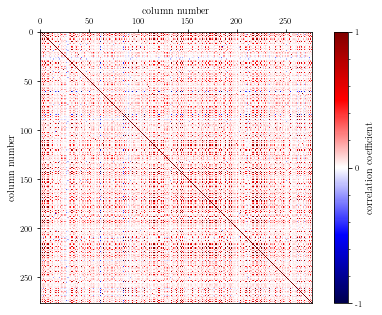

In [62]:
width = 390
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=1.5))
#ax.spines.right.set_visible(False)
#ax.spines.bottom.set_visible(False)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xlabel("column number")
ax.set_ylabel("column number")
pos = ax.imshow(correlation_matrix_shuffled, interpolation='nearest', interpolation_stage='data', cmap='seismic')
pos.set_clim([-1, 1])
cbar = fig.colorbar(pos, ax=ax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(labels=["-1", "0", "1"])
cbar.ax.set_ylabel("correlation coefficient")
cbar.minorticks_on()
plt.savefig("/home/flo/ssdgm/images/blog_corr_matrix.pdf", format='pdf', bbox_inches="tight", dpi=1000)
plt.show()


In [72]:
# the independent variables set
X = df_uci
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/home/flo/miniconda3/envs/ssdgm/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


     feature           VIF
0          0  1.868455e+04
1          1  7.571033e+03
2          2           inf
3          3  4.830254e+02
4          4  1.482564e+03
..       ...           ...
272      275           inf
273      276  1.030708e+00
274      278  4.892119e+00
275      279  4.894957e+00
276      280  1.574209e+00

[277 rows x 2 columns]


In [16]:
vif_data_cleaned = vif_data[vif_data["VIF"] != np.inf]
print(vif_data["VIF"].value_counts().sort_index(ascending=False)[:15])
print("Mean: ", np.mean(vif_data_cleaned["VIF"]))
print("Median: ", np.median(vif_data_cleaned["VIF"]))

inf             47
9.007199e+15     1
4.503600e+15     1
1.801440e+15     2
1.185158e+14     1
7.738144e+12     1
1.868157e+04     1
1.525605e+04     1
1.171641e+04     1
7.570491e+03     1
7.367320e+03     1
6.652383e+03     1
6.262206e+03     1
6.127703e+03     1
5.259898e+03     1
5.210153e+03     1
4.998934e+03     1
4.381566e+03     1
3.574248e+03     1
3.276218e+03     1
3.122485e+03     1
2.946343e+03     1
2.025159e+03     1
1.482539e+03     1
1.440868e+03     1
1.358742e+03     1
1.105203e+03     1
8.617520e+02     1
6.412948e+02     1
5.909720e+02     1
5.782100e+02     1
4.830180e+02     1
4.796095e+02     1
4.180374e+02     1
3.275960e+02     1
2.026397e+02     1
4.876439e+01     1
4.322403e+01     1
3.765730e+01     1
3.683294e+01     1
3.604401e+01     1
3.325599e+01     1
2.554137e+01     1
Name: VIF, dtype: int64
Mean:  75283548067642.86
Median:  1.2469538327792398


<AxesSubplot:ylabel='Frequency'>

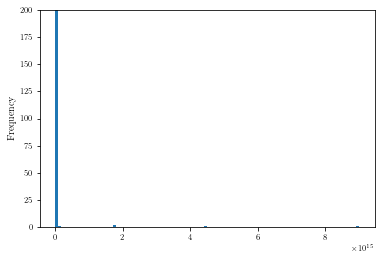

In [29]:
vif_data[vif_data["VIF"] != np.inf]["VIF"].plot.hist(bins=100, ylim=(0, 200))

In [15]:
for i in range(5, 100, 5):
    print(f"{i}: ", np.sum(vif_data["VIF"] > i))

5:  90
10:  90
15:  90
20:  90
25:  90
30:  89
35:  88
40:  85
45:  84
50:  83
55:  83
60:  83
65:  83
70:  83
75:  83
80:  83
85:  83
90:  83
95:  83


In [27]:
np.linalg.cond(X)

1.832935642244017e+23

In [45]:
df_corr = df_uci.corr()


<AxesSubplot:>

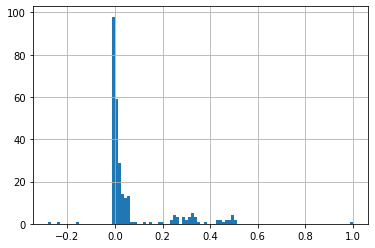

In [34]:
df_corr.loc[:, 280].hist(bins=100)

In [17]:
df_stdzd = (df_uci - df_uci.mean()) / df_uci.std()

array([[<AxesSubplot:xlabel='275', ylabel='275'>,
        <AxesSubplot:xlabel='276', ylabel='275'>,
        <AxesSubplot:xlabel='278', ylabel='275'>,
        <AxesSubplot:xlabel='279', ylabel='275'>,
        <AxesSubplot:xlabel='280', ylabel='275'>],
       [<AxesSubplot:xlabel='275', ylabel='276'>,
        <AxesSubplot:xlabel='276', ylabel='276'>,
        <AxesSubplot:xlabel='278', ylabel='276'>,
        <AxesSubplot:xlabel='279', ylabel='276'>,
        <AxesSubplot:xlabel='280', ylabel='276'>],
       [<AxesSubplot:xlabel='275', ylabel='278'>,
        <AxesSubplot:xlabel='276', ylabel='278'>,
        <AxesSubplot:xlabel='278', ylabel='278'>,
        <AxesSubplot:xlabel='279', ylabel='278'>,
        <AxesSubplot:xlabel='280', ylabel='278'>],
       [<AxesSubplot:xlabel='275', ylabel='279'>,
        <AxesSubplot:xlabel='276', ylabel='279'>,
        <AxesSubplot:xlabel='278', ylabel='279'>,
        <AxesSubplot:xlabel='279', ylabel='279'>,
        <AxesSubplot:xlabel='280', ylabel='279'

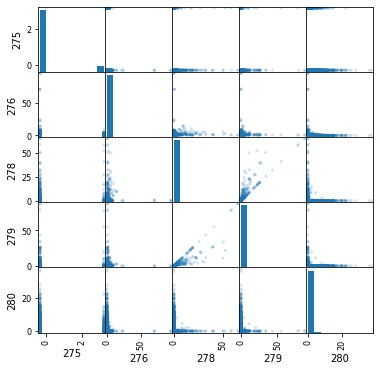

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_stdzd.iloc[:, -5:], alpha=0.2, figsize=(6, 6))

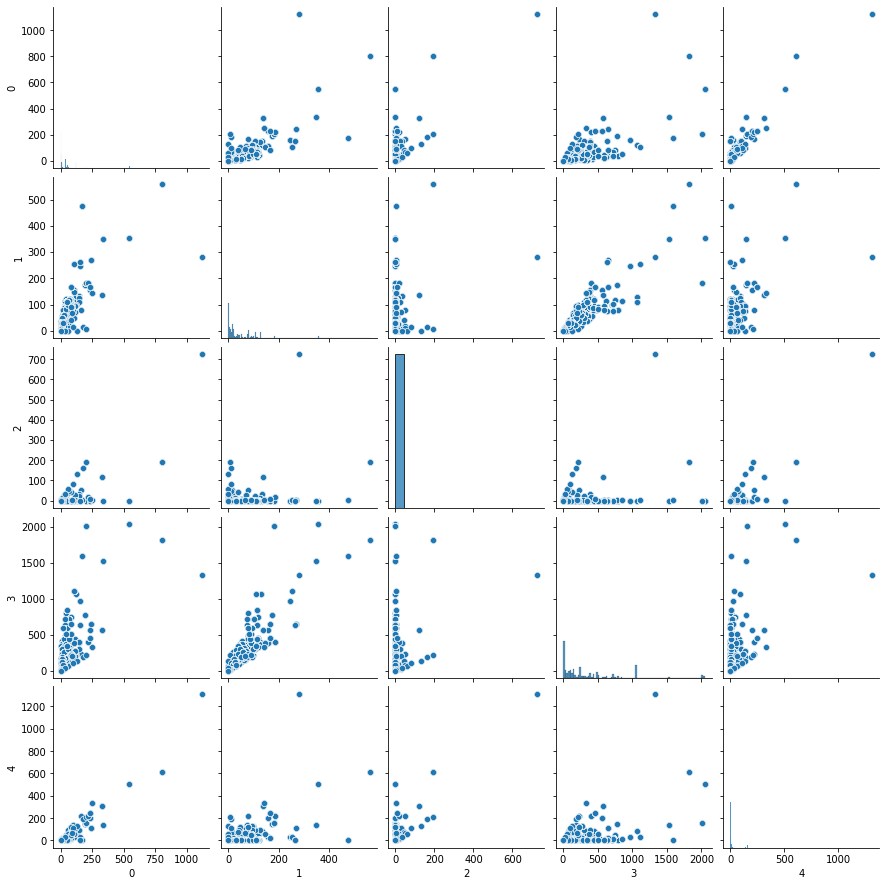

In [27]:
sns.pairplot(df_uci.iloc[:, :5])

## Conclusion

- only choose training set from UCI as dataset because SSDKL authors did the same
- use last column as target variable
- remove all-zero columns
